In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df=df[["survived","age","fare"]]

In [4]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [6]:
df['age'].fillna(df["age"].mean(),inplace=True)

In [7]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [8]:
x = df.iloc[:,1:3]
y =df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

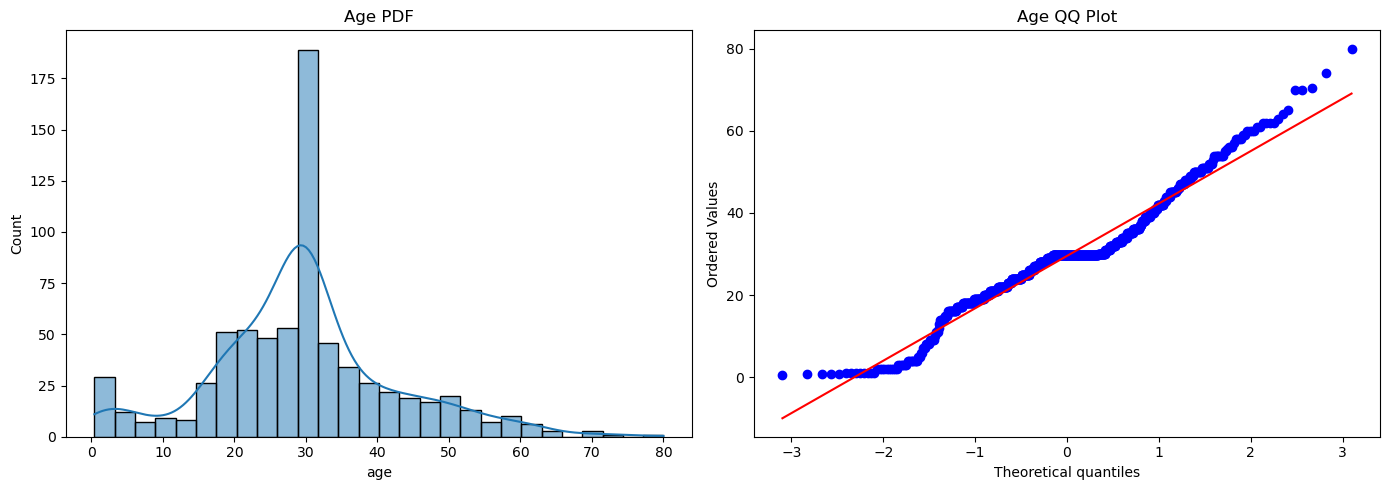

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(X_train["age"],kde=True)
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(X_train["age"],dist="norm",plot=plt)
plt.title("Age QQ Plot")

plt.tight_layout()
plt.show()

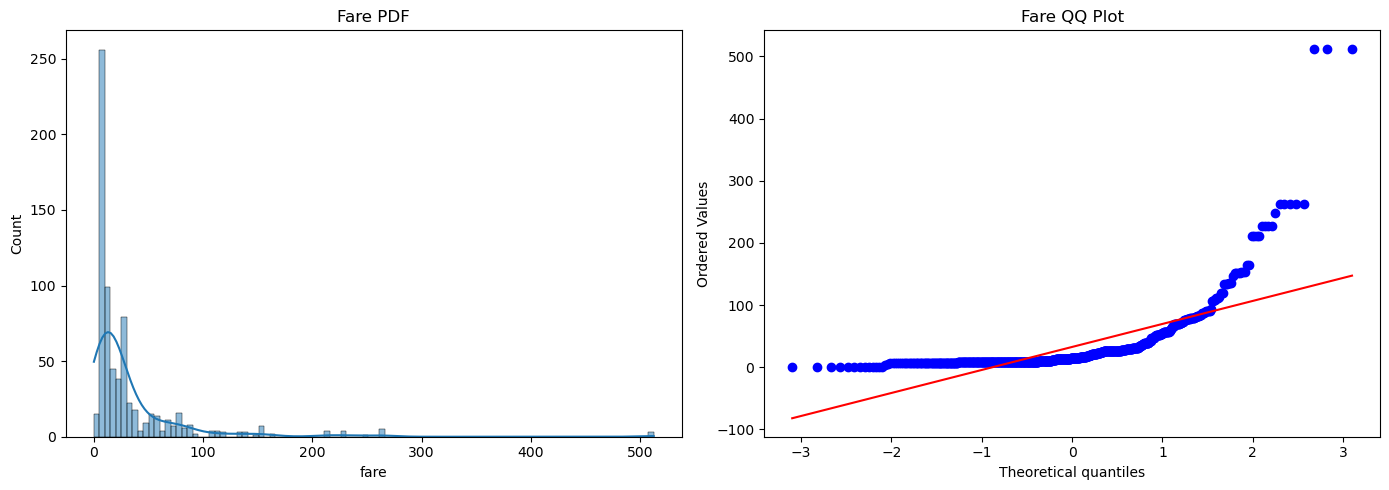

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(X_train["fare"],kde=True)
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(X_train["fare"],dist="norm",plot=plt)
plt.title("Fare QQ Plot")

plt.tight_layout()
plt.show()

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy Score for Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy Score for Decision Tree",accuracy_score(y_test,y_pred2))


Accuracy Score for Logistic Regression 0.6480446927374302
Accuracy Score for Decision Tree 0.6759776536312849


## Function Transformer

In [14]:
trf = FunctionTransformer(func=np.log1p) 
# np.log() is used to find logarithm and np.log1p will first add 1 to all values and then find log so we won't have issues if there are any zeros

In [15]:
X_train_transformed  = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy Score for Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy Score for Decision Tree",accuracy_score(y_test,y_pred2))

Accuracy Score for Logistic Regression 0.6815642458100558
Accuracy Score for Decision Tree 0.6759776536312849


#### now to be sure we cross validate

In [17]:
X_transformed  = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6543695380774033


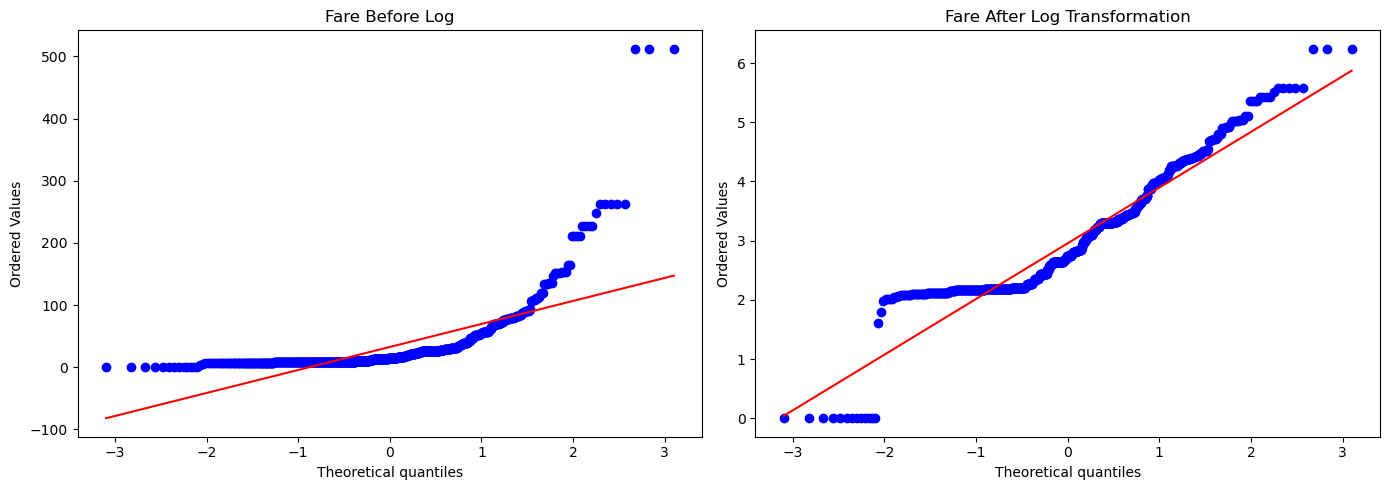

In [18]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
stats.probplot(X_train["fare"],dist="norm",plot=plt)
plt.title("Fare Before Log")

plt.subplot(1,2,2)
stats.probplot(X_train_transformed["fare"],dist="norm",plot=plt)
plt.title("Fare After Log Transformation")

plt.tight_layout()
plt.show()

#### when we apply on fare it becomes better and on age it worsens , as we know on right skewed data log transform works better and that is what happened on fare column